# Desafio data Wrangling

#### Curso Data Scientist CoderHouse

- Nombre: Gustavo Ferreri
- Camada: 18195
- Tutor: Rober Ribero
- Profesor: David Romero Acosta

#### Desafio data Wrangling

Consigna: Leer los data set w_data.csv y p_data.csv, fusionarlos a partir de la id, y realizar los siguientes ejercicios

* Cuantos id tienen en comun, y nombrar cuales no tienen en comun
* Dos target <=50k o >50k
* Corte
    - Porcentaje entre hombres y mujeres
    - Rasa
    - Educacion

Aspectos a incluir: debe estar hecho en notebook, probado el codigo.

## Solucion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_wData = pd.read_csv('w_data.csv', sep=';')

In [3]:
df_pData = pd.read_csv('p_data.csv', sep=';')

In [4]:
df_wData.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [5]:
df_pData.head()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [6]:
# Se fusionan los data frame usando el metodo merge, tomando como referencia ID
# Por otro lado indicamos que ID es el indice del data frame
# Sobre la misma linea depuramos un error en el dato que se daba en el dataSet df_wData, y que ocasionaria un desvio de los calculos
# Esta correccion soluciona el segundo punto de la correccion de distintos valores
df_unico = df_wData.merge(df_pData, on='ID', how='left').set_index('ID').replace({'<=50K.': '<=50K','>50K.': '>50K'}, regex=True)

In [7]:
df_unico

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
ID,,,,,,,,,,,,,,
49084,State-gov,77516.0,2174.0,0.0,40.0,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family
68553,Self-emp-not-inc,83311.0,0.0,0.0,13.0,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
143654,Private,215646.0,0.0,0.0,40.0,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family
41510,Private,234721.0,0.0,0.0,40.0,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband
195025,Private,338409.0,0.0,0.0,40.0,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735617153,Private,215419.0,0.0,0.0,36.0,<=50K,39.0,Female,White,United-States,Bachelors,13.0,Divorced,Not-in-family
1131807446,?,321403.0,0.0,0.0,40.0,<=50K,64.0,Male,Black,United-States,HS-grad,9.0,Widowed,Other-relative
781422087,Private,374983.0,0.0,0.0,50.0,<=50K,38.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband


###### Para Solucionar el primer punto, tomamos que cada ID se ve reflejada entre bases, por lo que cualquier dato incompleto o no correspondido deberia de arrojar un NaN, o algun error

In [8]:
df_unico[df_unico['Age'].isnull()]

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
ID,,,,,,,,,,,,,,
37078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344995623,Self-emp-inc,182148.0,0.0,0.0,60.0,>50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Encontramos que el id 37078, coincidente en ambas bases no muestra datos

In [9]:
df_pData[df_pData['ID']==37078]

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
32561,NaN,NaN,37078,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_wData[df_wData['ID']==37078]

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
32561,NaN,NaN,NaN,NaN,NaN,37078,NaN


In [11]:
# Eliminamos del Data Frame el valor vacio
df_unico = df_unico.drop(37078)

In [12]:
# Resolvemos la primer parte del primer ejercicio
df_unicoCount = df_unico.shape[0]-df_unico['Age'].isna().sum()

In [13]:
print(f'La cantidad de ID comunes son: {df_unicoCount}')

La cantidad de ID comunes son: 48841


In [14]:
# La segunda parte corresponde identificar no tienen en comun para lo cual apelamos a la primer linea que palicamos en este segmento
df_unicoNoComun = df_unico[df_unico['Age'].isnull()]

In [15]:
df_unico[df_unico['Age'].isnull()]

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
ID,,,,,,,,,,,,,,
1344995623,Self-emp-inc,182148.0,0.0,0.0,60.0,>50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(f'El ID no comun es: {df_unicoNoComun.index.values[0]}')

El ID no comun es: 1344995623


###### Ultimo punto a resolver

In [17]:
# Devemos resolver el porcentaje con salarios mayores a 50k respecto del total
# Para el calculo tenemos un outlier, que lo pudimos observar en el ejercicio anterior
porcentajeSalarios50K = (df_unico[df_unico['Target']==' >50K']['Target'].count()/df_unico['Target'].count())*100

In [18]:
dictEstudio = [porcentajeSalarios50K, 100 - porcentajeSalarios50K]

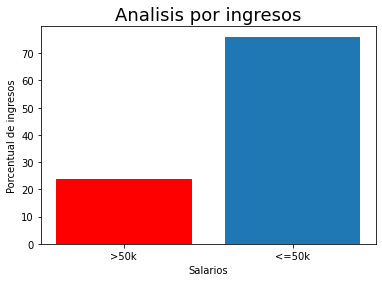

In [19]:
analisisPorcentual = plt.bar ( x = ['>50k', '<=50k'], height = dictEstudio)
analisisPorcentual[0].set_color('r')
plt.ylabel('Porcentual de ingresos')
plt.xlabel('Salarios')
plt.title('Analisis por ingresos', fontsize=18)
plt.show()

In [20]:
# Ahora deberemos realizar los cortes segun los criterios solicitados
# Hombres/Mujeres
# Rasa
# Educacion

In [28]:
df_sexo = df_unico[df_unico['Target']==' >50K'].groupby('Sex').count()

In [29]:
df_sexo

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target,Age,Race,Country,Education,Education-Num,Marital Status,Relationship
Sex,,,,,,,,,,,,,
Female,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769
Male,9917,9917,9917,9917,9917,9917,9917,9917,9917,9917,9917,9917,9917


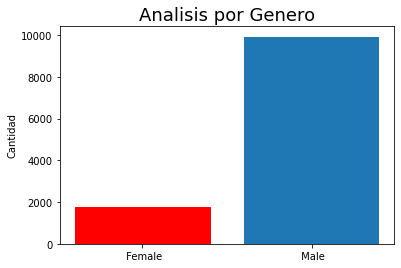

In [43]:
analisisSex = plt.bar(x=df_sexo.index, height=df_sexo['Race'])
analisisSex[0].set_color('r')
plt.ylabel('Cantidad')
plt.title('Analisis por Genero', fontsize=18)
plt.show()

In [44]:
df_rasa = df_unico[df_unico['Target']==' >50K'].groupby('Race').count()

In [45]:
df_rasa

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target,Age,Sex,Country,Education,Education-Num,Marital Status,Relationship
Race,,,,,,,,,,,,,
Amer-Indian-Eskimo,55,55,55,55,55,55,55,55,55,55,55,55,55
Asian-Pac-Islander,409,409,409,409,409,409,409,409,409,409,409,409,409
Black,566,566,566,566,566,566,566,566,566,566,566,566,566
Other,50,50,50,50,50,50,50,50,50,50,50,50,50
White,10606,10606,10606,10606,10606,10606,10606,10606,10606,10606,10606,10606,10606


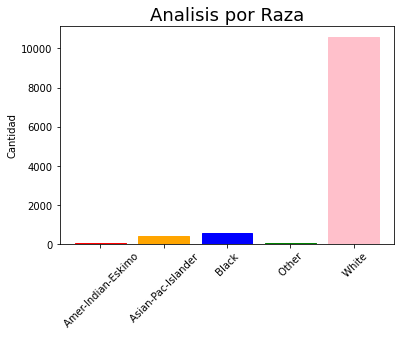

In [58]:
analisisSex = plt.bar(x=df_rasa.index, height=df_rasa['Sex'])
analisisSex[0].set_color('r')
analisisSex[1].set_color('orange')
analisisSex[2].set_color('b')
analisisSex[3].set_color('green')
analisisSex[4].set_color('pink')
plt.xticks(rotation=45) 
plt.ylabel('Cantidad')
plt.title('Analisis por Raza', fontsize=18)
plt.show()

In [30]:
df_educacion = df_unico[df_unico['Target']==' >50K'].groupby('Education').count()

In [31]:
df_educacion

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target,Age,Sex,Race,Country,Education-Num,Marital Status,Relationship
Education,,,,,,,,,,,,,
10th,87,87,87,87,87,87,87,87,87,87,87,87,87
11th,92,92,92,92,92,92,92,92,92,92,92,92,92
12th,48,48,48,48,48,48,48,48,48,48,48,48,48
1st-4th,8,8,8,8,8,8,8,8,8,8,8,8,8
5th-6th,27,27,27,27,27,27,27,27,27,27,27,27,27
7th-8th,62,62,62,62,62,62,62,62,62,62,62,62,62
9th,41,41,41,41,41,41,41,41,41,41,41,41,41
Assoc-acdm,413,413,413,413,413,413,413,413,413,413,413,413,413
Assoc-voc,522,522,522,522,522,522,522,522,522,522,522,522,522


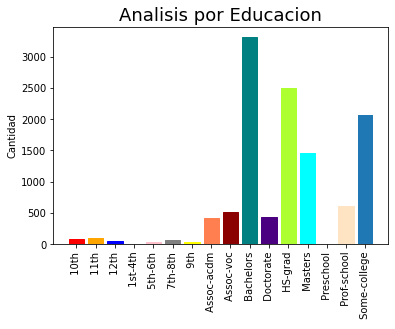

In [80]:
analisisSex = plt.bar(x=df_educacion.index, height=df_educacion['Education-Num'])
analisisSex[0].set_color('r')
analisisSex[1].set_color('orange')
analisisSex[2].set_color('b')
analisisSex[3].set_color('green')
analisisSex[4].set_color('pink')
analisisSex[5].set_color('grey')
analisisSex[6].set_color('yellow')
analisisSex[7].set_color('coral')
analisisSex[8].set_color('darkred')
analisisSex[9].set_color('teal')
analisisSex[10].set_color('indigo')
analisisSex[11].set_color('greenyellow')
analisisSex[12].set_color('cyan')
analisisSex[13].set_color('orchid')
analisisSex[14].set_color('bisque')
plt.xticks(rotation=90) 
plt.ylabel('Cantidad')
plt.title('Analisis por Educacion', fontsize=18)
plt.show()